# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [60]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [19]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [20]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [34]:
#Explore columns
data.columns
data.loc()


In [31]:
r = np.corrcoef(data,rowvar=False) # True = variables are rowwise; False = variables are columnwise
# Plot the data:
plt.imshow(r) 
plt.colorbar()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [71]:
#Loading Test data
test_data=pd.read_csv('test (1).csv')
test_data
data =pd.read_csv('train.csv')
data.shape
# print(data['region'])
data['region'] = pd.factorize(data['region'])[0] + 1
# print(data['region'])
data['accommodation_type'] = pd.factorize(data['accommodation_type'])[0] + 1
data['min_cost_to_book_hotel'] = data['cost']*data['minimum_nights']
data['reviews_per_owned_hotels'] = data['number_of_reviews']/data['owned_hotels']
data['reviews_per_owned_hotels'] = data['reviews_per_owned_hotels'].round(2)
data['reviews_per_owned_hotels_per_month'] = data['reviews_per_month']/data['owned_hotels']
data['min_cost_to_book_hotel'] = data['cost']*data['minimum_nights']
data['reviews_per_owned_hotels'] = data['number_of_reviews']/data['owned_hotels']
data['reviews_per_owned_hotels'] = data['reviews_per_owned_hotels'].round(2)
data['reviews_per_owned_hotels_per_month'] = data['reviews_per_month']/data['owned_hotels']
data['reviews_region'] = data['number_of_reviews']*data['region']
data['latitude_cost_hotel'] = data['latitude']*data['min_cost_to_book_hotel']
data['longitude_reviews'] = data['longitude']*data['number_of_reviews']
data['accommodation_type_in_latitude'] = data['latitude']*data['accommodation_type']
data['reviews_longitudnal'] = data['longitude']*data['number_of_reviews']
data['reviews_lati'] = data['latitude']*data['number_of_reviews']
data['cost_owned_hotels'] = data['cost']*data['owned_hotels']
data = data.fillna(0)
data = data.to_numpy()
data.shape
# data

(2870, 22)

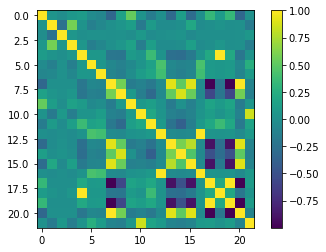

In [72]:
r = np.corrcoef(data,rowvar=False) # True = variables are rowwise; False = variables are columnwise
# Plot the data:
plt.imshow(r) 
plt.colorbar()

In [73]:
zscoredData = stats.zscore(data)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)

[6.88128358e+00 2.64951095e+00 2.13715695e+00 1.98788744e+00
 1.72861738e+00 1.46799837e+00 1.04021435e+00 9.56155659e-01
 8.06155087e-01 6.59620966e-01 5.17670689e-01 3.53976612e-01
 3.33744069e-01 2.23900187e-01 1.13881124e-01 1.09588578e-01
 4.03038706e-02 1.41780878e-06 7.78851716e-07 8.21714662e-08
 2.86427998e-08 6.01333467e-39]


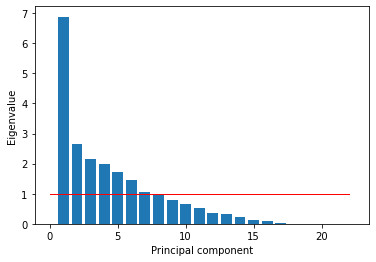

In [75]:
numClasses = 22
plt.bar(np.linspace(1,22,22),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line
print(eigVals)

[0.11304332 0.0142582  0.0007846  0.00859246 0.13518065 0.05208431
 0.0561228  0.3677669  0.26324498 0.07126246 0.07405594 0.12382212
 0.03657054 0.35077785 0.25207955 0.33842211 0.03657861 0.36775937
 0.13517676 0.36775937 0.36776642 0.0674481 ]
0.367766902356755


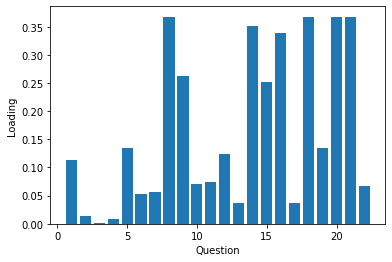

[0.17939163 0.16129424 0.03930289 0.15360546 0.07536635 0.3516921
 0.30391816 0.08739948 0.09719931 0.09770892 0.21806819 0.17226777
 0.4865133  0.07242435 0.09865837 0.05784974 0.48654136 0.08743002
 0.07551547 0.08743002 0.08740519 0.26588184]
0.4865413594930532


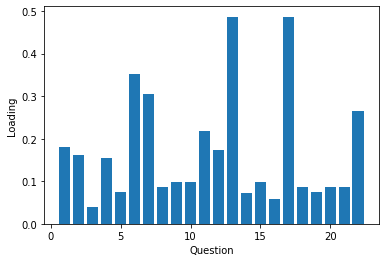

[0.10359428 0.29160007 0.08521824 0.2845935  0.52892416 0.05146146
 0.00164238 0.09743723 0.07519335 0.04281925 0.11831756 0.34756517
 0.04998084 0.02616612 0.15882262 0.15990873 0.04998525 0.09734184
 0.52863525 0.09734184 0.09737299 0.13199936]
0.5289241649699197


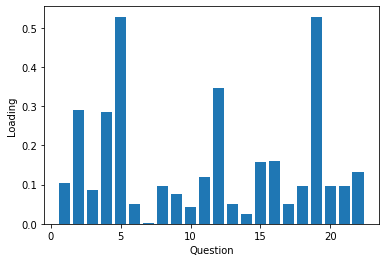

[0.24580212 0.29397998 0.10657251 0.26238585 0.09104907 0.08582
 0.10837328 0.06198445 0.17198093 0.19089022 0.40859918 0.12719171
 0.38633436 0.04701089 0.1697693  0.0079324  0.38629983 0.06204936
 0.09143053 0.06204936 0.06202313 0.37826004]
0.4085991836432248


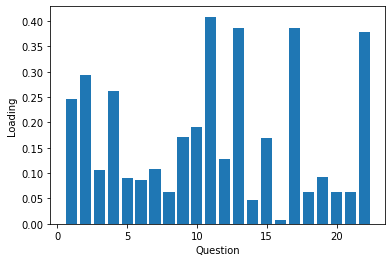

[0.49955542 0.02101418 0.0654966  0.03574712 0.17229796 0.0066389
 0.05582483 0.01407555 0.32752666 0.49089982 0.35777325 0.00089787
 0.00636793 0.0025421  0.27877864 0.02353751 0.00637748 0.01404039
 0.17250302 0.01404039 0.01412472 0.355557  ]
0.49955541649638546


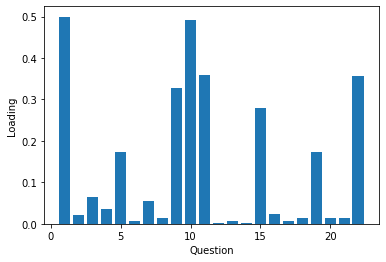

[0.11824715 0.49533289 0.17112145 0.44307814 0.32769289 0.07301633
 0.03751539 0.00054575 0.12715939 0.08728843 0.31800044 0.18755153
 0.01021535 0.02178425 0.16063316 0.12057956 0.01021805 0.00068965
 0.32828158 0.00068965 0.00069243 0.303407  ]
0.4953328946359417


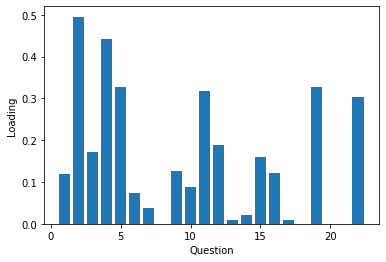

[6.27659784e-02 9.15493631e-02 8.95781562e-01 3.45479487e-01
 4.07863298e-02 1.69647970e-01 1.52852167e-01 4.79763102e-05
 1.15743927e-02 3.47276007e-02 1.03574178e-02 6.08424407e-02
 2.12279923e-02 1.45678595e-04 1.97251200e-02 1.74826205e-02
 2.12756227e-02 4.49506784e-05 3.77527919e-02 4.49506784e-05
 6.54567562e-04 6.25934215e-02]
0.8957815623190652


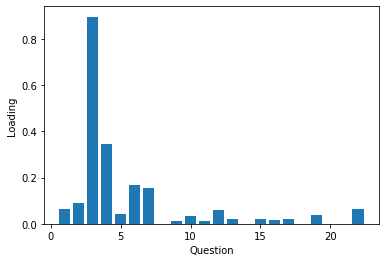

[1.53767108e-02 6.66896670e-02 1.92046456e-01 1.70600070e-01
 1.32240747e-04 6.22724000e-01 7.13688940e-01 8.57822563e-03
 1.51885443e-02 1.08180700e-01 8.12725854e-02 3.84623473e-02
 1.11905467e-02 1.39131281e-02 1.40442205e-02 7.70046587e-03
 1.11771305e-02 8.62274873e-03 5.19654449e-04 8.62274873e-03
 8.44009667e-03 1.05737008e-01]
0.7136889396160139


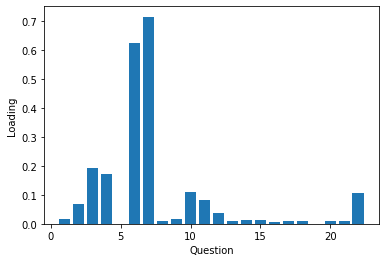

[0.08574673 0.2174896  0.00414382 0.18508826 0.18040881 0.13755139
 0.06511941 0.09643341 0.24297938 0.63627413 0.18431072 0.3755227
 0.05757181 0.05918946 0.31519531 0.03254852 0.05757759 0.09651305
 0.18040177 0.09651305 0.09640466 0.19021832]
0.6362741339148363


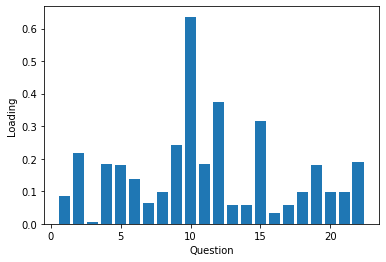

[0.18546687 0.0139883  0.01789587 0.01802901 0.08920132 0.29685221
 0.22570879 0.08911269 0.38266469 0.09573141 0.10943666 0.61234076
 0.1698555  0.0411899  0.41049261 0.08386121 0.16981738 0.08912756
 0.08937294 0.08912756 0.08905484 0.02313022]
0.6123407641723428


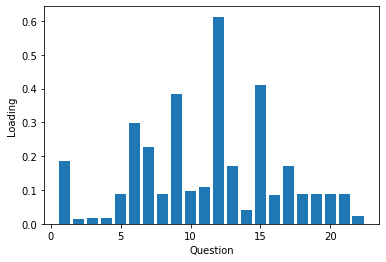

[2.13940677e-01 1.26000924e-01 4.59038280e-02 7.99677068e-02
 2.79073954e-02 5.28239015e-01 5.45702668e-01 3.58430814e-02
 1.38867398e-01 2.03219654e-04 1.43417522e-01 3.50229571e-01
 2.75172018e-01 3.00626076e-02 1.22521134e-01 7.26746972e-02
 2.75104814e-01 3.58049882e-02 2.81305856e-02 3.58049882e-02
 3.58279922e-02 1.05868545e-01]
0.5457026681829167


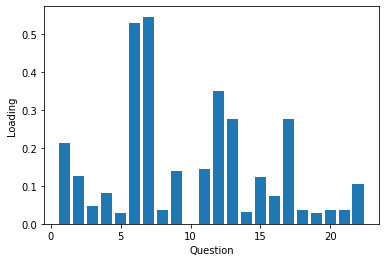

[0.24595989 0.61783305 0.2946875  0.61856783 0.02700486 0.00183533
 0.02338702 0.04909099 0.03211302 0.20001007 0.00501299 0.09047626
 0.00576114 0.05808652 0.05593216 0.14369427 0.00576293 0.04904669
 0.02806545 0.04904669 0.04890102 0.01327666]
0.6185678266039496


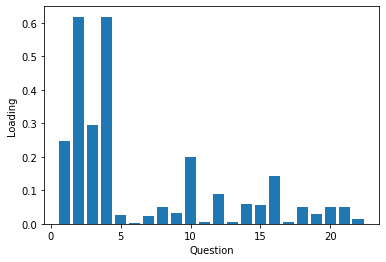

[0.67114269 0.17718819 0.12873437 0.23216092 0.08187457 0.06183705
 0.02884801 0.05536112 0.02996293 0.47943102 0.03113805 0.34196815
 0.01800358 0.08121369 0.17351889 0.15764273 0.01799623 0.05532902
 0.08141248 0.05532902 0.05535309 0.08120558]
0.6711426926272746


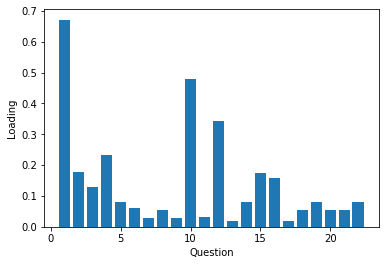

[0.12832381 0.16604264 0.0275105  0.02889559 0.02112625 0.02753435
 0.01899224 0.03762937 0.43867193 0.03031565 0.00812707 0.09499764
 0.00575367 0.699087   0.32661381 0.38476417 0.00573862 0.03721737
 0.02115844 0.03721737 0.03726736 0.0288392 ]
0.6990870010436793


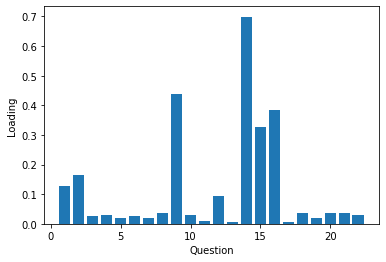

[0.01958961 0.04421424 0.01077827 0.03747483 0.00868767 0.20679316
 0.01840595 0.07718817 0.10007937 0.01875582 0.63224346 0.05335295
 0.03175958 0.08189896 0.11345092 0.26762995 0.03185689 0.07752378
 0.00873502 0.07752378 0.07752953 0.65017249]
0.6501724922068614


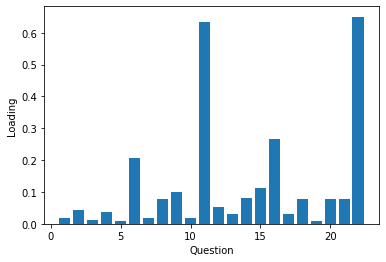

[0.02725246 0.19328612 0.01464366 0.02343192 0.00209767 0.09065137
 0.0209923  0.18195787 0.28336394 0.00987118 0.25009691 0.0412464
 0.01511318 0.09488822 0.25030967 0.7417239  0.01515709 0.18284191
 0.00237166 0.18284191 0.18286994 0.2283419 ]
0.7417238969191817


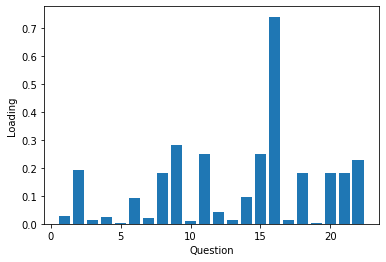

[0.01149212 0.01814934 0.00213006 0.01201543 0.00269461 0.00098983
 0.0011389  0.16951512 0.50277873 0.01885144 0.01774055 0.01775633
 0.00105315 0.58960406 0.51987091 0.11106056 0.00102985 0.16980583
 0.00294771 0.16980583 0.16933789 0.01689655]
0.5896040598827644


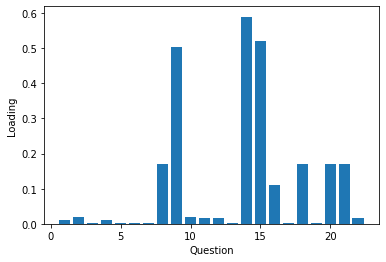

[4.18607255e-05 8.90518835e-05 2.29568546e-04 1.49104341e-04
 2.33459379e-01 6.44958921e-06 3.19924950e-06 1.39456146e-01
 2.70780509e-04 7.13944739e-06 1.91303885e-06 3.14716606e-05
 7.47707519e-03 1.43181899e-04 1.23110288e-04 1.64176070e-04
 7.48009743e-03 3.33163547e-01 2.33475082e-01 3.33163547e-01
 8.05872266e-01 2.11691109e-06]
0.8058722660602775


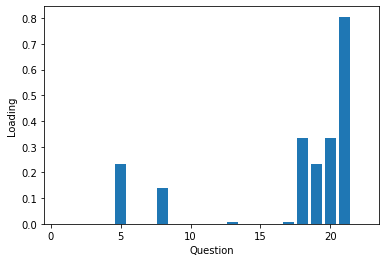

[1.32241245e-06 4.81264706e-07 2.47350791e-03 2.49450879e-05
 6.67359364e-01 1.22445977e-06 5.88349293e-06 3.91059590e-02
 8.88797009e-05 7.56796835e-06 1.97193808e-05 5.55129247e-05
 7.15957102e-03 1.56496843e-04 1.31161902e-04 2.06729292e-04
 7.15380026e-03 1.20493075e-01 6.67329214e-01 1.20493075e-01
 2.80407043e-01 2.64255747e-05]
0.6673593638510114


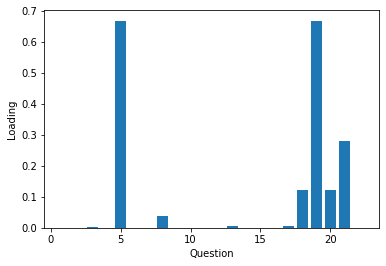

[4.37901091e-06 1.32146004e-04 1.14951158e-04 1.67322551e-04
 7.48778462e-03 1.52535452e-06 6.73638281e-06 8.53991104e-01
 7.57202788e-07 4.27050934e-06 7.49139921e-06 2.54578551e-06
 2.68014932e-03 4.44429160e-05 9.64827043e-06 8.13323981e-04
 2.67764820e-03 3.52582048e-01 7.48933143e-03 3.52582048e-01
 1.48134266e-01 4.45241732e-07]
0.8539911042413326


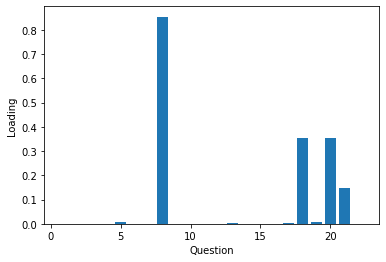

[5.33970133e-06 1.38045180e-05 6.20804637e-06 4.12775796e-06
 9.25038950e-03 1.01246372e-05 4.57852285e-05 2.15404862e-03
 3.84042468e-06 3.79303725e-06 4.25413500e-05 9.77665656e-06
 7.07012247e-01 1.89702453e-05 7.22836742e-06 4.72995597e-06
 7.07039620e-01 3.64273778e-03 9.25552482e-03 3.64273778e-03
 5.12206716e-03 7.05948226e-05]
0.7070396199703811


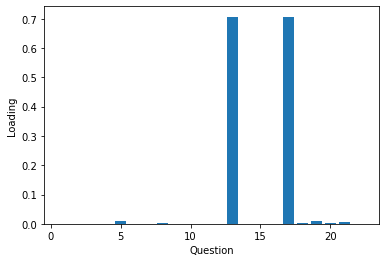

[0.00000000e+00 5.02366274e-17 3.30205563e-18 1.50944566e-17
 1.51486615e-16 7.14321358e-18 7.49731245e-18 5.04747793e-18
 2.54664853e-17 1.98371599e-17 2.94400418e-17 2.16923818e-18
 1.61614737e-15 1.73707074e-17 1.42921957e-17 4.30772997e-17
 1.62535240e-15 7.07106781e-01 1.48223465e-16 7.07106781e-01
 1.36249697e-16 2.92628518e-17]
0.7071067811865475


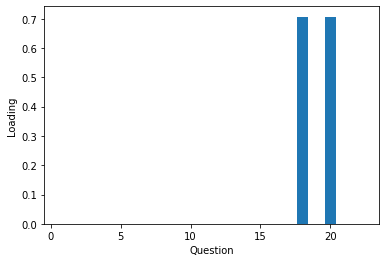

In [97]:
lst =[]
for i in range(22):
    whichPrincipalComponent = i
    lst.append(np.argmax(np.abs(loadings[whichPrincipalComponent,:])))
    plt.figure()
    plt.bar(np.linspace(1,22,22),np.abs(loadings[whichPrincipalComponent,:]))
    print(np.abs(loadings[whichPrincipalComponent,:]))
    print(np.max(np.abs(loadings[whichPrincipalComponent,:])))
    plt.xlabel('Question')
    plt.ylabel('Loading')
    plt.show()
    

In [98]:
lst

[7, 16, 4, 10, 0, 1, 2, 6, 9, 11, 6, 3, 0, 13, 21, 15, 13, 20, 4, 7, 16, 19]



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---